In [36]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import matplotlib.colors as mcolors
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
MET_res="/media/cap/extra_work/CERISE/MET_results"
cmap_custom = mcolors.ListedColormap(['blue',"white", 'red'])  # Define a custom colormap with two colors

ncfile = "grid_stat_000000L_20160501_000000V_pairs.nc"
nf = os.path.join(MET_res,ncfile)
dataset = xr.open_dataset(nf)
var = "FCST_bin_snow_all_all_FULL_ge1_NBRHD_9"

In [38]:
[key for key in dataset.variables.keys() if "OBS" in key]

['OBS_bin_snow_0_all_all_FULL',
 'OBS_DMAP_ge1_bin_snow_0_all_all_FULL',
 'OBS_bin_snow_0_all_all_FULL_ge1',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_9',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_25',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_49']

In [39]:
[key for key in dataset.variables.keys() if "FCST" in key]

['FCST_bin_snow_all_all_FULL',
 'FCST_DMAP_ge1_bin_snow_all_all_FULL',
 'FCST_bin_snow_all_all_FULL_ge1',
 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_9',
 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_25',
 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_49']

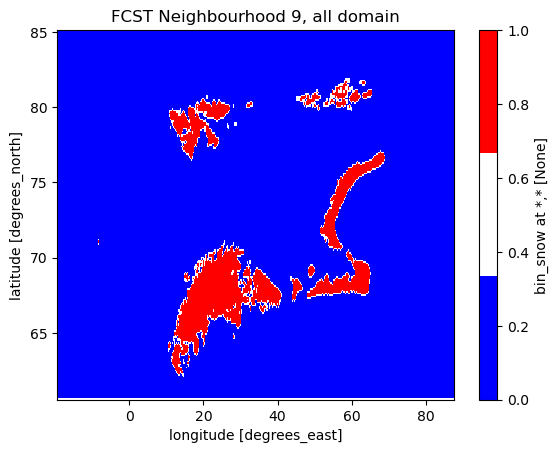

In [40]:
dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
variable = dataset[var]
plt.title('FCST Neighbourhood 9, all domain')
plt.show()

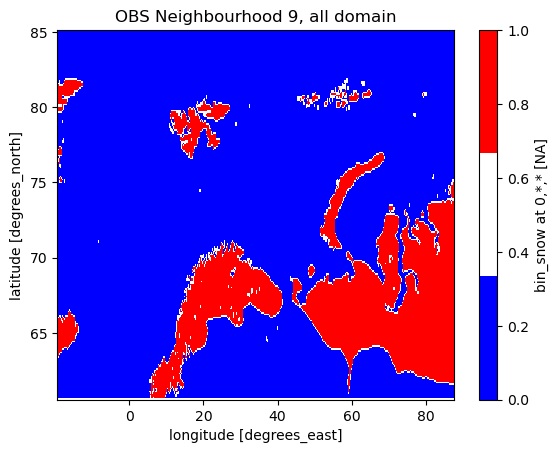

In [41]:
var = "OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_9"
dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
variable = dataset[var]
plt.title('OBS Neighbourhood 9, all domain')
plt.show()

In [42]:
[key for key in dataset.variables.keys() if "DIFF" in key]

['DIFF_bin_snow_all_all_bin_snow_0_all_all_FULL']

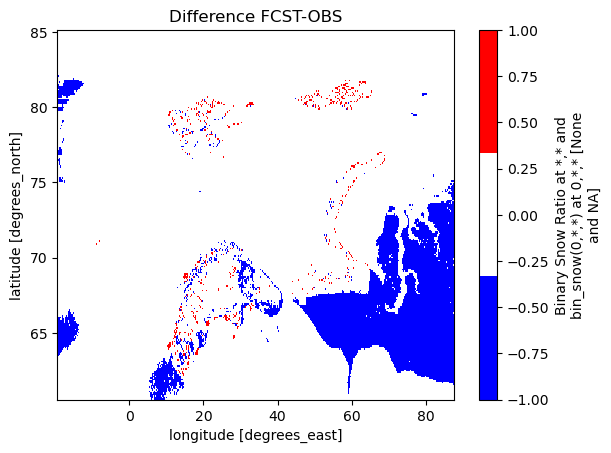

In [44]:
var = "DIFF_bin_snow_all_all_bin_snow_0_all_all_FULL"


# Define the range of latitude and longitude for the region you want to zoom in
#West Greenland

#lat_min, lat_max = 67,72 #  62,67
#lon_min, lon_max = -55,-47.5

# Nuuk
#lat_min, lat_max = 62.5,65.5 #  62,67
#lon_min, lon_max = -60,-40

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
#plt.xlim(lon_min, lon_max)
#plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('Difference FCST-OBS')
plt.show()

In [45]:
dataset[var].min()

<xarray.DataArray 'DIFF_bin_snow_all_all_bin_snow_0_all_all_FULL' ()>
array(-1., dtype=float32)

In [46]:
dataset[var].max()

<xarray.DataArray 'DIFF_bin_snow_all_all_bin_snow_0_all_all_FULL' ()>
array(1., dtype=float32)

In [47]:
all_obs=dataset['OBS_bin_snow_0_all_all_FULL_ge1']
all_fcst = dataset["FCST_bin_snow_all_all_FULL"]

In [48]:
all_fcst.max()

<xarray.DataArray 'FCST_bin_snow_all_all_FULL' ()>
array(1., dtype=float32)

In [49]:
all_obs.max()

<xarray.DataArray 'OBS_bin_snow_0_all_all_FULL_ge1' ()>
array(1., dtype=float32)

In [50]:
all_obs.min()

<xarray.DataArray 'OBS_bin_snow_0_all_all_FULL_ge1' ()>
array(0., dtype=float32)

In [51]:
[key for key in dataset.variables.keys() if "NBRHD" in key]

['FCST_bin_snow_all_all_FULL_ge1_NBRHD_9',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_9',
 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_25',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_25',
 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_49',
 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_49']

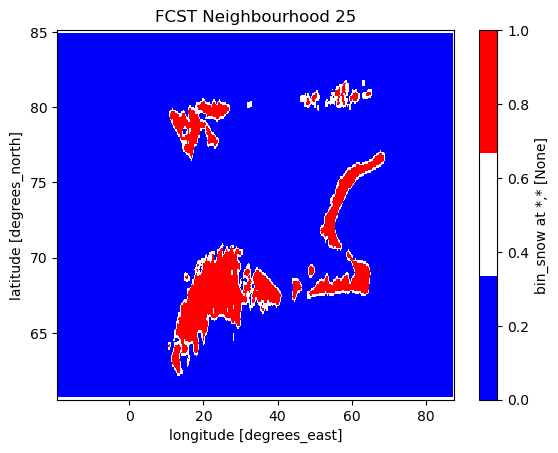

In [54]:

var = 'FCST_bin_snow_all_all_FULL_ge1_NBRHD_25'


dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
#plt.xlim(lon_min, lon_max)
#plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('FCST Neighbourhood 25')
plt.show()

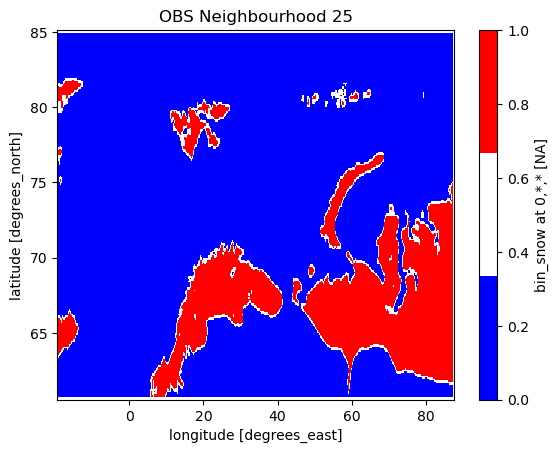

In [56]:
#var = 'FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_49'
#var = 'OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_49'
var = 'OBS_bin_snow_0_all_all_FULL_ge1_NBRHD_25'

dataset[var].plot(x="lon",y="lat",cmap=cmap_custom)
# Set the axis limits based on the specified latitude and longitude range
#plt.xlim(lon_min, lon_max)
#plt.ylim(lat_min, lat_max)
#variable.plot(x='lon', y='lat')
variable = dataset[var]
plt.title('OBS Neighbourhood 25')
plt.show()

In [12]:
#dataset[var]

In [57]:
not_nan_points = dataset[var].notnull()


### Select the points where there is data defined, so the map is more clearly visible

In [58]:
#not_nan_coords = dataset[var].coords[not_nan_points]
not_nan_coords = dataset[var].where(not_nan_points, drop=True)


In [59]:
lat = not_nan_coords['lat']
lon = not_nan_coords['lon']

# Select points in dataset[var] with lat and lon coordinates from not_nan_coords
selected_points = dataset[var].sel(lat=lat, lon=lon)

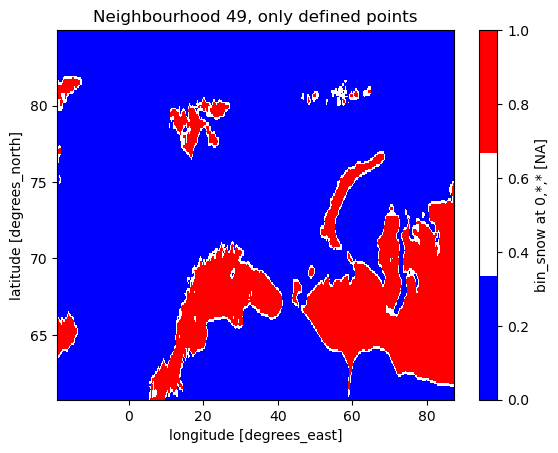

In [60]:
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 49, only defined points')
plt.show()

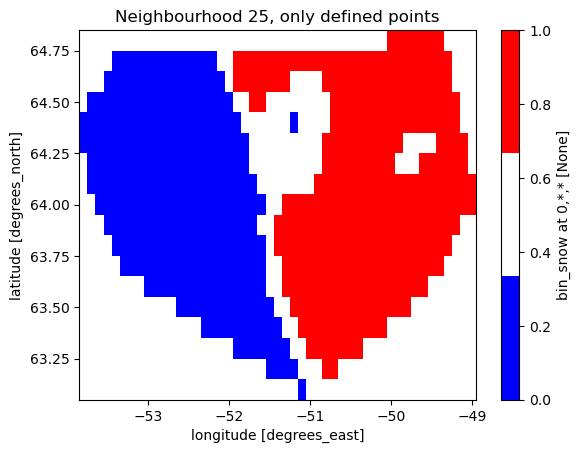

In [18]:
var = "OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_25"
var = "OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_25"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 25, only defined points')
plt.show()

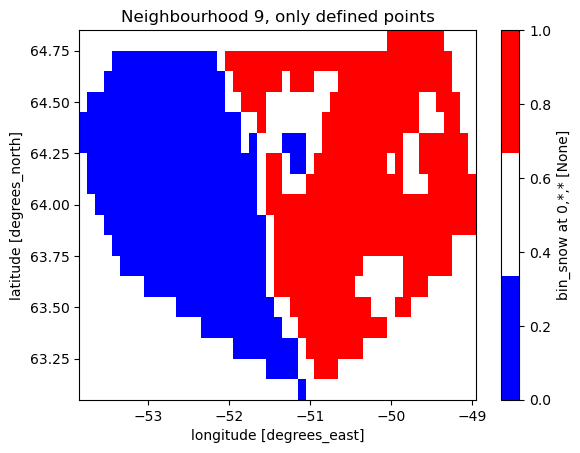

In [19]:
var = "OBS_bin_snow_0_all_all_GREENLAND_WEST_SECTION_ge1_NBRHD_9"
var = "OBS_bin_snow_0_all_all_NUUK_ge1_NBRHD_9"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 9, only defined points')
plt.show()

### Forecast data below

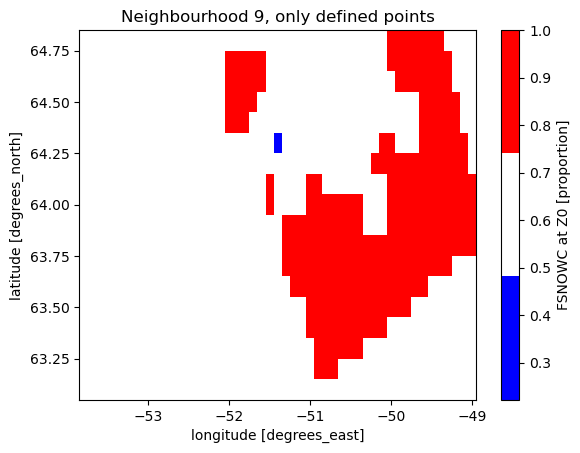

In [20]:
var = "FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_9"
var = "FCST_FSNOWC_Z0_NUUK_ge1_NBRHD_9"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 9, only defined points')
plt.show()

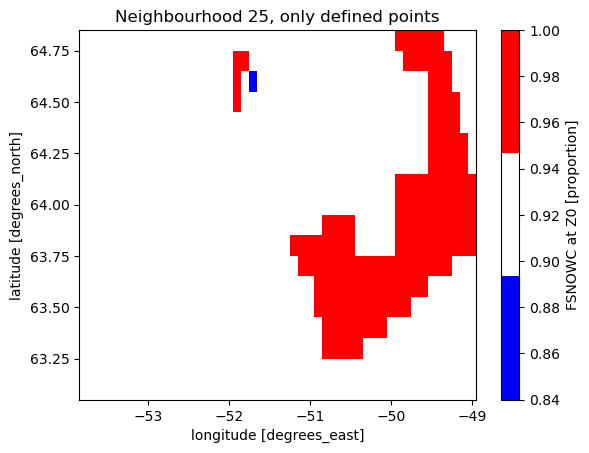

In [21]:
var = "FCST_FSNOWC_Z0_GREENLAND_WEST_SECTION_ge1_NBRHD_25"
var = "FCST_FSNOWC_Z0_NUUK_ge1_NBRHD_25"

selected_points = dataset[var].sel(lat=lat, lon=lon)
selected_points.plot(x="lon",y="lat",cmap=cmap_custom)
plt.title('Neighbourhood 25, only defined points')
plt.show()